<a href="https://colab.research.google.com/github/tuanlym/DOANII/blob/main/Train_padded140v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install pyvi
!pip install pandas
!pip install numpy
!pip install gensim

     |████████████████████████████████| 8.5 MB 25.4 MB/s 
     |████████████████████████████████| 743 kB 46.7 MB/s 


In [ ]:
import gensim, re
import numpy as np
import pandas as pd
import pickle
from os import listdir

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from keras.regularizers import l1
from keras.layers import Activation
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout, Flatten
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces,preprocess_string, split_alphanum, strip_short, strip_numeric

In [ ]:
def clean_document(raw):
    raw = ViTokenizer.tokenize(raw)
    raw = strip_non_alphanum(raw).lower().strip()
    raw = split_alphanum(raw)
    raw = strip_short(raw, minsize=2)
    raw = strip_numeric(raw)
    tokens = raw.split()
    return tokens

In [ ]:
raw = "! MỘt môn Học rất hay,,,, và bổ ích 456"
clean_document(raw)

['một', 'môn', 'học', 'rất', 'hay', 'và', 'bổ_ích']

In [ ]:
stop_word = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [ ]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stop_word:
            words.append(word)
    return ' '.join(words)
    return line

In [ ]:
line = "Môn tiếng anh là môn học rất bổ ích"
remove_stopwords(line)

'Môn tiếng anh môn học bổ ích'

In [ ]:
document = []
with open('/content/drive/MyDrive/DOANII /train_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
with open('/content/drive/MyDrive/DOANII /test_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
len(document)

14592

In [ ]:
labels_data = []
with open('/content/drive/MyDrive/DOANII /train_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
with open('/content/drive/MyDrive/DOANII /test_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
len(labels_data)

14592

In [ ]:
sentences = []
for d in document:
  d = ViTokenizer.tokenize(d)
  d = remove_stopwords(d)
  sentences.append(clean_document(d))
#sentences


In [ ]:
labels = []
for i in range(0,len(labels_data)):
  if labels_data[i] == '0':
     labels.append((1,0,0))
  elif labels_data[i] == '1':
     labels.append((0,1,0))
  else:
     labels.append((0,0,1))
labels = pd.get_dummies(labels)
labels

,"(0, 0, 1)","(0, 1, 0)","(1, 0, 0)"
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
14587,0,0,1
14588,1,0,0
14589,1,0,0
14590,0,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.3, shuffle=True)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
word_model = gensim.models.Word2Vec(x_train, size=300, window = 10, min_count=1, iter=10)

In [ ]:
word_model.wv.save_word2vec_format('/content/drive/MyDrive/DOANII /vnw2v.txt', fvocab=None, binary=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(x_train)
tokenizer.word_index


In [ ]:
padded_x_train = tokenizer.texts_to_sequences(x_train)
padded_x_train = pad_sequences(padded_x_train, maxlen = 140)
padded_x_train.shape

(10214, 140)

In [ ]:
padded_x_test = tokenizer.texts_to_sequences(x_test)
padded_x_test = pad_sequences(padded_x_test, maxlen = 140)
padded_x_test.shape

(4378, 140)

In [ ]:
padded_x_train.shape[1]

140

In [ ]:
len(word_model.wv.vocab)

3179

In [ ]:
 enumerate(word_model.wv.vectors)

In [ ]:
padded_x_train = np.array(padded_x_train)
y_train = np.array(y_train)
padded_x_test = np.array(padded_x_test)
y_test = np.array(y_test)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, 300))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec
model = Sequential()
model.add(Embedding(len(word_model.wv.vocab) +1,300,input_length=padded_x_train.shape[1],weights=[embedding_matrix],trainable=False))
model.add(LSTM(300,return_sequences=False))
model.add(Flatten())
model.add(Dense(3,activation="softmax"))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])
batch = 64
epochs = 100
history = model.fit(padded_x_train,y_train,batch,epochs,steps_per_epoch=50, validation_data=(padded_x_test, y_test),callbacks = [callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 140, 300)          954000    
                                                                 
 lstm_3 (LSTM)               (None, 300)               721200    
                                                                 
 flatten_1 (Flatten)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 903       
                                                                 
Total params: 1,676,103
Trainable params: 722,103
Non-trainable params: 954,000
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 80s 1s/step - loss: 0.8021 - acc: 0.6062 - val_loss: 0.7492 - val_acc: 0.6339
Epoch 2/100
50/50 [======================

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_sen = ["mình ghét môn tiếng anh"]
test_seq = tokenizer.texts_to_sequences(test_sen)
padded_test_seq = pad_sequences(test_seq, maxlen = 140)
padded_test_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  131, 2216,   43,   78,   75]], dtype=int32)

In [ ]:
model.predict(padded_test_seq)

array([[0.02578801, 0.46475723, 0.5094548 ]], dtype=float32)

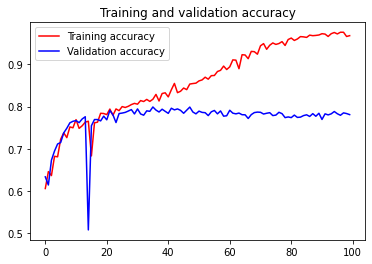

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

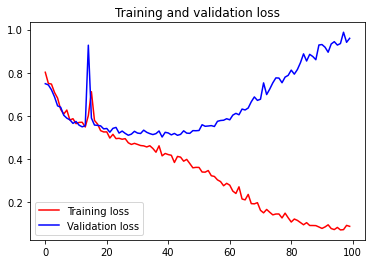

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(padded_x_test, batch_size=50)
labels = ['Tiêu cực', 'Trung tính', 'Tích cực']

In [ ]:
predY = []
testY = []
for i in range(2000):
  y_p = np.argmax(y_pred[i])
  y_t = np.argmax(y_test[i])
  predY.append(y_p)
  testY.append(y_t)

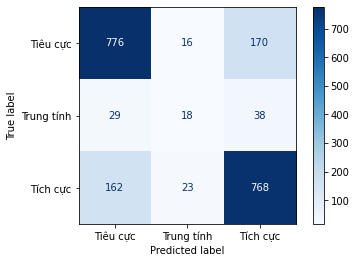

In [ ]:
cm = confusion_matrix(testY, predY)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(testY, predY, target_names=labels))

              precision    recall  f1-score   support

    Tiêu cực       0.80      0.81      0.80       962
  Trung tính       0.32      0.21      0.25        85
    Tích cực       0.79      0.81      0.80       953

    accuracy                           0.78      2000
   macro avg       0.64      0.61      0.62      2000
weighted avg       0.77      0.78      0.78      2000

